In [1]:
#Importing required packages.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [ ]:

from sklearn.neural_network import MLPClassifier

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
df = pd.read_csv('roo_data.csv')

In [ ]:
df

In [4]:
mapp= {'networks': {'security': 'Network Security Administrator', 
                    'developer': 'Network Security Engineer', 
                    'cloud computing': 'Network Engineer', 
                    'Business process analyst': 'Project Manager', 
                    'system developer': 'Database Administrator', 
                    'testing': 'Portal Administrator'}, 
       'Software Engineering': {'security': 'Information Technology Manager', 
                                'developer': 'Software Engineer', 
                                'cloud computing': 'User Interface Developer', 
                                'Business process analyst': 'Design & UX', 
                                'system developer': 'UX Designer', 
                                'testing': 'Software Developer'}, 
       'parallel computing': {'security': 'CRM Business Analyst', 
                              'developer': 'Business Systems Analyst', 
                              'cloud computing': 'Database Developer', 
                              'Business process analyst': 'Solutions Architect', 
                              'system developer': 'Software Systems Engineer', 
                              'testing': 'Software Quality Assurance (QA) / Testing'}, 
       'Management': {'security': 'Database Manager', 'developer': 'Web Developer', 
                      'cloud computing': 'CRM Technical Developer', 
                      'Business process analyst': 'Technical Support', 
                      'system developer': 'Quality Assurance Associate', 'testing': 'Data Architect'}, 'programming': {'security': 'Network Security Administrator', 'developer': 'Network Security Engineer', 'cloud computing': 'Network Engineer', 'Business process analyst': 'Project Manager', 'system developer': 'Database Administrator', 'testing': 'Portal Administrator'}, 'cloud computing': {'security': 'Information Technology Manager', 'developer': 'Software Engineer', 'cloud computing': 'User Interface Developer', 'Business process analyst': 'Design & UX', 'system developer': 'UX Designer', 'testing': 'Software Developer'}, 'Computer Architecture': {'security': 'CRM Business Analyst', 'developer': 'Business Systems Analyst', 'cloud computing': 'Database Developer', 'Business process analyst': 'Solutions Architect', 'system developer': 'Software Systems Engineer', 'testing': 'Software Quality Assurance (QA) / Testing'}, 'data engineering': {'security': 'Database Manager', 'developer': 'Web Developer', 'cloud computing': 'CRM Technical Developer', 'Business process analyst': 'Technical Support', 'system developer': 'Quality Assurance Associate', 'testing': 'Data Architect'}, 'hacking': {'security': 'Network Security Administrator', 'developer': 'Network Security Engineer', 'cloud computing': 'Network Engineer', 'Business process analyst': 'Project Manager', 'system developer': 'Database Administrator', 'testing': 'Portal Administrator'}, 'IOT': {'security': 'Information Technology Manager', 'developer': 'Software Engineer', 'cloud computing': 'User Interface Developer', 'Business process analyst': 'Design & UX', 'system developer': 'UX Designer', 'testing': 'Software Developer'}}

In [5]:
var_area = 'interested career area '
var_sub = 'Interested subjects'

for ind in df.index:
    var_num = 6
    
    var = df[var_area][ind]
    var2 = df[var_sub][ind]
    
    if(ind% var_num == 0 or df['Interested subjects'][ind] == 'hacking'):
        continue
    
    df['Suggested Job Role'][ind] = mapp[var2][var]

C:\Users\anan yaya\AppData\Local\Temp\ipykernel_11672\1011160074.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Suggested Job Role'][ind] = mapp[var2][var]


In [6]:
df_desc = df.describe().to_dict()

In [7]:
var = "O"
catCols = [col for col in df.columns if df[col].dtype== var ]

In [8]:
# Bucketing here - subjects below 25% are given 0, the subjects between 25-75% are given 1, the subjects above 75% are given 2

def mapping(x, var_for_percentile_25, var_for_percentile_75 ):
    apply_var = 0
    
    if( x < var_for_percentile_25):
        apply_var =0
        
    elif(x > var_for_percentile_75):
        apply_var = 1
        
    else:
        apply_var = 2
    
    return apply_var



for column in df.columns:
    
    # Check if column is numeric
    if column in catCols:
        continue
        
    if column not in catCols:
        # Replace values
        var_for_percentile_25 = df_desc[column]['25%']
        var_for_percentile_75 = df_desc[column]['75%']
        var_25 = '25%'
        var_75 = '75%'
        
        var_map_25 = mapping(25, var_for_percentile_25, var_for_percentile_75  )
        var_map_75 = mapping(75, var_for_percentile_25, var_for_percentile_75  )
        
        df[column] = df[column].apply(lambda var: 0 if var < df_desc[column][var_25] else (2 if var > df_desc[column][var_75] else 1))
        
    

In [9]:
# Normalize the data
for col in df.columns:
    # Check if column is numeric
    if col in catCols:
        continue
        
    if col not in catCols:
        # Normalizing the data by using the mean and standard deviation.
        var1= df[col]
        mean= df[col].mean()
        std = df[col].std()
        sub = (var1 - mean)
        df[col] = sub / std

In [10]:
from sklearn.preprocessing import LabelEncoder

classes = {}

for item in catCols:
    lb_make = LabelEncoder()
    var = df[item]
    var2 = lb_make.fit_transform(var)
    
    df[item] = var2
    classes[item] = (lb_make.classes_, lb_make.transform(lb_make.classes_))

In [11]:
target = df['Suggested Job Role']

df.drop(['Gentle or Tuff behaviour?'], axis=1, inplace=True)

df.drop(['In a Realtionship?'], axis=1, inplace=True)
df.drop(['percentage in Algorithms'], axis=1, inplace=True)
df.drop(['Percentage in Communication skills'], axis=1, inplace=True)
df.drop(['Logical quotient rating'], axis=1, inplace=True)
df.drop(['hackathons'], axis=1, inplace=True)
df.drop(['hard/smart worker'], axis=1, inplace=True)

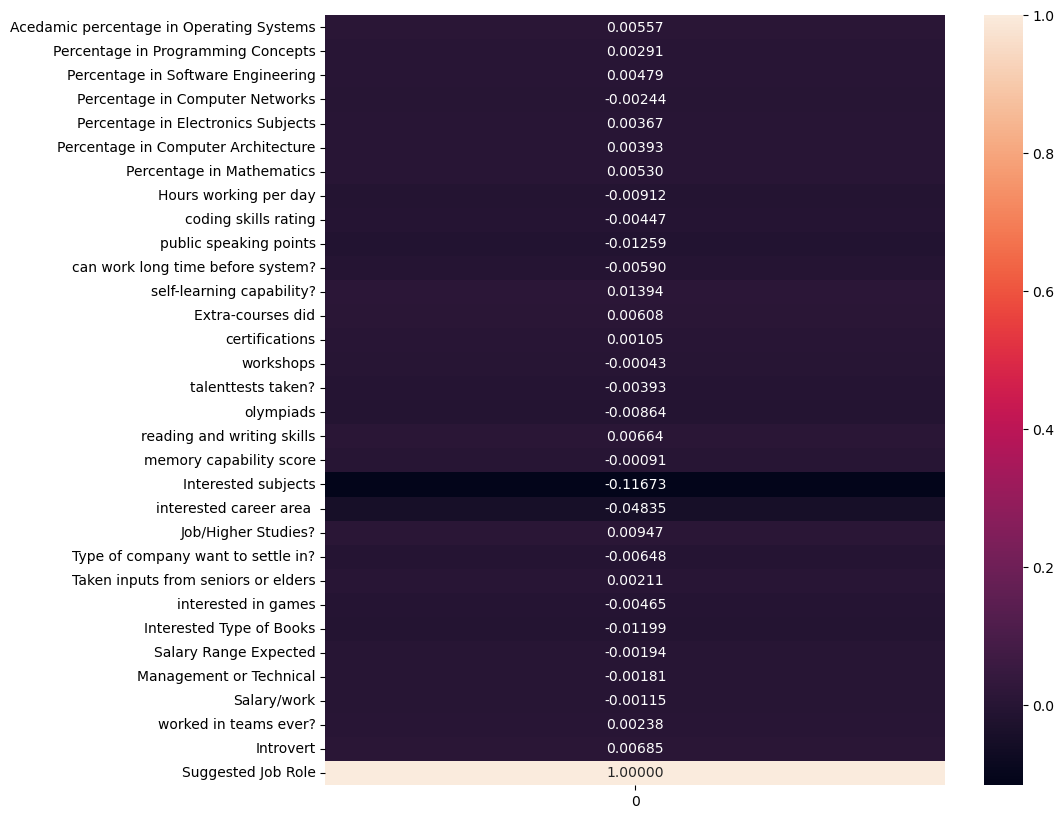

In [12]:
# Correlation matrix between input and target
var_target = df['Suggested Job Role']
corr = df.corrwith(var_target)

var_size = 10

plt.figure(figsize=(var_size,var_size))

sns.heatmap(corr.to_frame(), annot=True, fmt='.5f')
plt.show()

In [13]:
var_target

0         7
1        20
2        17
3        18
4        24
         ..
19995    32
19996    31
19997    15
19998    24
19999    22
Name: Suggested Job Role, Length: 20000, dtype: int32

In [14]:
inputs = df.values

In [15]:
splits = ['60-40', '70-30', '80-20', '90-10']
train_test = []
for split in splits:
    var_arr = split.split('-')
    
    var_first = var_arr[0]
    var_second = var_arr[1]
    
    train_size = float(var_first)/100
    test_size = float(var_second)/100
    
    X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=test_size, train_size=train_size, random_state=42)
    
    train_test.append((X_train, X_test, y_train, y_test))
    
    len_X_train = len(X_train)
    len_X_test = len(X_test)
    
    
    print('Split: ', split)
    print('Train Size: ', len_X_train , '   Test Size: ', len_X_test )

Split:  60-40
Train Size:  12000    Test Size:  8000
Split:  70-30
Train Size:  14000    Test Size:  6000
Split:  80-20
Train Size:  16000    Test Size:  4000
Split:  90-10
Train Size:  18000    Test Size:  2000


In [16]:
# grid search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import os
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
# define the grid search parameters

var_constant = 'constant'
var_alpha = 0.0001
var_relu = 'relu'
adam = 'adam'
max_itr = 10000

param_grid = {
    'hidden_layer_sizes': [(128, 64, 32, 16), (256, 128, 64, 32, 16)],
    
    'activation': [var_relu],
    'solver': ['sgd', adam],
    'alpha': [var_alpha, 0.05],
    'learning_rate': [var_constant,'adaptive'],
    'max_iter': [max_itr],
    'early_stopping': [True]
}


for split in train_test:
    X_train, X_test, y_train, y_test = split
    print('')
    
    var_TrainSize = len(X_train)
    var_TestSize = len(X_test)
    print('Train Size: ', var_TrainSize)
    print('Test Size: ', var_TestSize)

    grid_search = GridSearchCV(estimator = MLPClassifier(), param_grid = param_grid, cv = 2, n_jobs = os.cpu_count()//3, verbose = 2)
    
    grid_search.fit(X_train, y_train)
    
    var_BestParam = grid_search.best_params_
    var_BestScore =  grid_search.best_score_
    print('Best Parameters: ', var_BestParam )
    print('Best Score: ', var_BestScore)

    model = MLPClassifier(**grid_search.best_params_)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    var_accuracy =  accuracy_score(y_test, y_pred)
    print('Accuracy: ', var_accuracy)
    


Train Size:  12000
Test Size:  8000
Fitting 2 folds for each of 16 candidates, totalling 32 fits
Best Parameters:  {'activation': 'relu', 'alpha': 0.05, 'early_stopping': True, 'hidden_layer_sizes': (128, 64, 32, 16), 'learning_rate': 'constant', 'max_iter': 10000, 'solver': 'adam'}
Best Score:  0.9108333333333334
Accuracy:  0.949125

Train Size:  14000
Test Size:  6000
Fitting 2 folds for each of 16 candidates, totalling 32 fits
Best Parameters:  {'activation': 'relu', 'alpha': 0.05, 'early_stopping': True, 'hidden_layer_sizes': (128, 64, 32, 16), 'learning_rate': 'constant', 'max_iter': 10000, 'solver': 'adam'}
Best Score:  0.9197857142857142
Accuracy:  0.923

Train Size:  16000
Test Size:  4000
Fitting 2 folds for each of 16 candidates, totalling 32 fits
Best Parameters:  {'activation': 'relu', 'alpha': 0.05, 'early_stopping': True, 'hidden_layer_sizes': (256, 128, 64, 32, 16), 'learning_rate': 'constant', 'max_iter': 10000, 'solver': 'adam'}
Best Score:  0.9468125000000001
Accurac

In [17]:
suggested_role = "Suggested Job Role"
Y = pd.DataFrame(df[suggested_role])
X = pd.DataFrame(df.drop(suggested_role, 1, inplace=False))

Y= Y.astype(np.float32)
X = X.astype(np.float32)

C:\Users\anan yaya\AppData\Local\Temp\ipykernel_11672\4268048973.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = pd.DataFrame(df.drop(suggested_role, 1, inplace=False))


In [18]:
# FOR TEST SIZE 60-40
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.40, random_state = 10)

model = MLPClassifier(solver='adam', hidden_layer_sizes=(700, 200), max_iter=100,
                      verbose=2, activation='relu', random_state=5)

model.fit(X_train, Y_train.to_numpy().ravel())


print("Confusion Matrix")

y_pred = model.predict(X_test)
print(confusion_matrix(y_pred, Y_test)) # the Confusion Matrix plotted
print('')
print('')

conf_mat = confusion_matrix(y_pred, Y_test)
print("Classwise Accuracies")
print(conf_mat.diagonal()/conf_mat.sum(axis=1)) # the value of all the Class-wise Accuracies

Iteration 1, loss = 3.14577902
Iteration 2, loss = 2.74460998
Iteration 3, loss = 2.60453626
Iteration 4, loss = 2.46532346
Iteration 5, loss = 2.33392682
Iteration 6, loss = 2.22236363
Iteration 7, loss = 2.11960951
Iteration 8, loss = 2.05696012
Iteration 9, loss = 2.00025640
Iteration 10, loss = 1.93916269
Iteration 11, loss = 1.89125377
Iteration 12, loss = 1.83683347
Iteration 13, loss = 1.79300276
Iteration 14, loss = 1.74518227
Iteration 15, loss = 1.69510244
Iteration 16, loss = 1.65219056
Iteration 17, loss = 1.60701212
Iteration 18, loss = 1.57069220
Iteration 19, loss = 1.53004575
Iteration 20, loss = 1.48784190
Iteration 21, loss = 1.45459032
Iteration 22, loss = 1.41667201
Iteration 23, loss = 1.38359389
Iteration 24, loss = 1.35695407
Iteration 25, loss = 1.31068393
Iteration 26, loss = 1.29446602
Iteration 27, loss = 1.25086302
Iteration 28, loss = 1.21952006
Iteration 29, loss = 1.18757952
Iteration 30, loss = 1.16977082
Iteration 31, loss = 1.12365746
Iteration 32, los

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:
# FOR TEST SIZE 70-30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 10)

model = MLPClassifier(solver='adam', hidden_layer_sizes=(700, 200), max_iter=100,
                      verbose=2, activation='relu', random_state=5)

model.fit(X_train, Y_train.to_numpy().ravel())


print("Confusion Matrix")

y_pred = model.predict(X_test)
print(confusion_matrix(y_pred, Y_test)) # the Confusion Matrix plotted
print('')
print('')

conf_mat = confusion_matrix(y_pred, Y_test)
print("Classwise Accuracies")
print(conf_mat.diagonal()/conf_mat.sum(axis=1)) # the value of all the Class-wise Accuracies

Iteration 1, loss = 3.09588247
Iteration 2, loss = 2.70531120
Iteration 3, loss = 2.54496127
Iteration 4, loss = 2.39551269
Iteration 5, loss = 2.24612196
Iteration 6, loss = 2.14332696
Iteration 7, loss = 2.06630297
Iteration 8, loss = 1.99736049
Iteration 9, loss = 1.94247040
Iteration 10, loss = 1.88581881
Iteration 11, loss = 1.83881793
Iteration 12, loss = 1.79398156
Iteration 13, loss = 1.74630459
Iteration 14, loss = 1.70390621
Iteration 15, loss = 1.66973601
Iteration 16, loss = 1.63778361
Iteration 17, loss = 1.59602008
Iteration 18, loss = 1.55237062
Iteration 19, loss = 1.51203096
Iteration 20, loss = 1.47195990
Iteration 21, loss = 1.43942198
Iteration 22, loss = 1.40185717
Iteration 23, loss = 1.37011360
Iteration 24, loss = 1.32747781
Iteration 25, loss = 1.30119829
Iteration 26, loss = 1.26234275
Iteration 27, loss = 1.23004882
Iteration 28, loss = 1.21994461
Iteration 29, loss = 1.17490439
Iteration 30, loss = 1.13897890
Iteration 31, loss = 1.11489204
Iteration 32, los

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
# FOR TEST SIZE 80-20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 10)

model = MLPClassifier(solver='adam', hidden_layer_sizes=(700, 200), max_iter=100,
                      verbose=2, activation='relu', random_state=5)

model.fit(X_train, Y_train.to_numpy().ravel())


print("Confusion Matrix")

y_pred = model.predict(X_test)
print(confusion_matrix(y_pred, Y_test)) # the Confusion Matrix plotted
print('')
print('')

conf_mat = confusion_matrix(y_pred, Y_test)
print("Classwise Accuracies")
print(conf_mat.diagonal()/conf_mat.sum(axis=1)) # the value of all the Class-wise Accuracies

Iteration 1, loss = 3.06420106
Iteration 2, loss = 2.66997977
Iteration 3, loss = 2.48299944
Iteration 4, loss = 2.32818391
Iteration 5, loss = 2.19339206
Iteration 6, loss = 2.09782384
Iteration 7, loss = 2.02400023
Iteration 8, loss = 1.95669813
Iteration 9, loss = 1.89405488
Iteration 10, loss = 1.83417719
Iteration 11, loss = 1.78909728
Iteration 12, loss = 1.73452358
Iteration 13, loss = 1.68133300
Iteration 14, loss = 1.63709732
Iteration 15, loss = 1.60473306
Iteration 16, loss = 1.55765192
Iteration 17, loss = 1.52077289
Iteration 18, loss = 1.48481072
Iteration 19, loss = 1.45090436
Iteration 20, loss = 1.41991076
Iteration 21, loss = 1.38555894
Iteration 22, loss = 1.35594273
Iteration 23, loss = 1.32327430
Iteration 24, loss = 1.29794965
Iteration 25, loss = 1.26828757
Iteration 26, loss = 1.22818004
Iteration 27, loss = 1.20235278
Iteration 28, loss = 1.17176199
Iteration 29, loss = 1.15308161
Iteration 30, loss = 1.11906824
Iteration 31, loss = 1.08782824
Iteration 32, los

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
# FOR TEST SIZE 90-10
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10, random_state = 10)

model = MLPClassifier(solver='adam', hidden_layer_sizes=(700, 200), max_iter=100,
                      verbose=2, activation='relu', random_state=5)

model.fit(X_train, Y_train.to_numpy().ravel())


print("Confusion Matrix")

y_pred = model.predict(X_test)
print(confusion_matrix(y_pred, Y_test)) # the Confusion Matrix plotted
print('')
print('')

conf_mat = confusion_matrix(y_pred, Y_test)
print("Classwise Accuracies")
print(conf_mat.diagonal()/conf_mat.sum(axis=1)) # the value of all the Class-wise Accuracies

Iteration 1, loss = 3.04733034
Iteration 2, loss = 2.64289084
Iteration 3, loss = 2.45165142
Iteration 4, loss = 2.27831284
Iteration 5, loss = 2.14261517
Iteration 6, loss = 2.05684882
Iteration 7, loss = 1.98787675
Iteration 8, loss = 1.91923674
Iteration 9, loss = 1.85841616
Iteration 10, loss = 1.79704103
Iteration 11, loss = 1.75327356
Iteration 12, loss = 1.70361853
Iteration 13, loss = 1.65742153
Iteration 14, loss = 1.61007665
Iteration 15, loss = 1.57314684
Iteration 16, loss = 1.53144840
Iteration 17, loss = 1.49085391
Iteration 18, loss = 1.45798440
Iteration 19, loss = 1.42541250
Iteration 20, loss = 1.39296211
Iteration 21, loss = 1.35844663
Iteration 22, loss = 1.33650640
Iteration 23, loss = 1.30715621
Iteration 24, loss = 1.27834927
Iteration 25, loss = 1.24629318
Iteration 26, loss = 1.21566263
Iteration 27, loss = 1.19238684
Iteration 28, loss = 1.16963135
Iteration 29, loss = 1.14135299
Iteration 30, loss = 1.11731241
Iteration 31, loss = 1.08600936
Iteration 32, los

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
